In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
# TODO add the custom dataset, Please maintain separate files for training and testing
train = pd.read_csv('Datasets/housedataset/Train/Train_Data.csv')
test = pd.read_csv('Datasets/housedataset/Test/Test_Data.csv')

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal
1,1102,20,RL,61.0,9758,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,1103,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
3,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
4,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(train.shape,test.shape)

(1100, 81) (360, 80)


# Data Cleaning and Visualtization

In [6]:
# Store all the id's separately as they are not required anymore while training
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id",axis= 1,inplace = True)
test.drop("Id",axis = 1,inplace = True)

In [7]:
print(train.shape,test.shape)

(1100, 80) (360, 79)


In [8]:
train['SalePrice'].describe()

count      1100.000000
mean     181253.129091
std       79584.698625
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Get Sales Price Distribution


 mu = 181253.13 and sigma = 79548.52



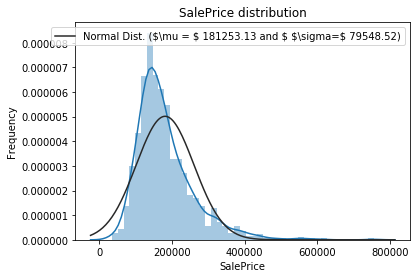

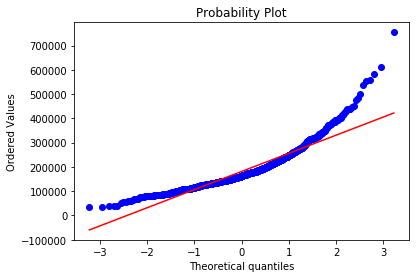

Skewness: 1.754432
Kurtosis: 5.445387


In [9]:
sns.distplot(train['SalePrice'],fit = norm)
(mu,sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))
plt.legend(['Normal Dist. ($\mu = $ {:.2f} and $ $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [10]:
cat = len(train.select_dtypes(include=['object']).columns)
num = len(train.select_dtypes(include=['int64','float64']).columns)

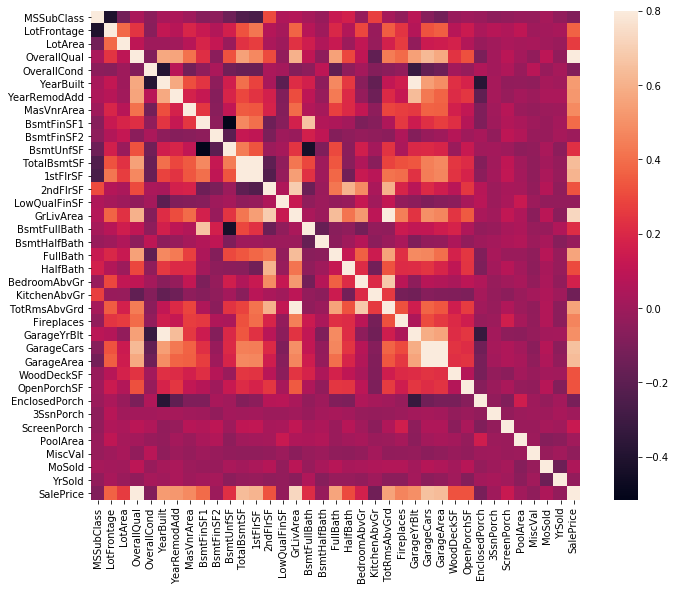

In [11]:
# print a correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square = True)

# Top 10 correlation matrix/ Heat map

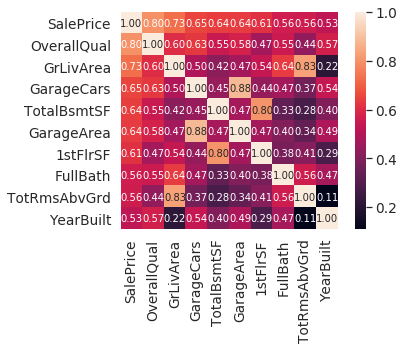

In [12]:
# Get first 10 elements which matters most on SalePrice
k = 10
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True, annot = True, square = True, fmt = '.2f', annot_kws={'size':10},yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [13]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,TotalBsmtSF
5,GarageArea
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


ALL these features will be plotted and Data Cleaning on these will be performed

# Overall Quality vs Sale Price

(-0.5, 9.5, 0, 800000)

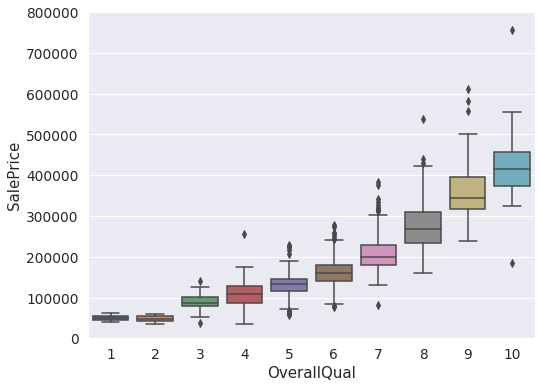

In [14]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

# Living Area vs Sale Price

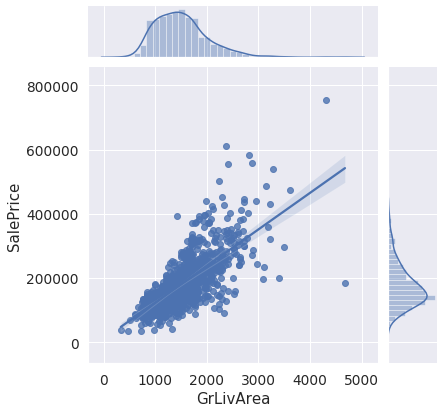

In [15]:
sns.jointplot(x = train['GrLivArea'], y = train['SalePrice'],kind = 'reg')

### According to the graph there are some outliers, they need to be removed

In [16]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index).reset_index(drop=True)


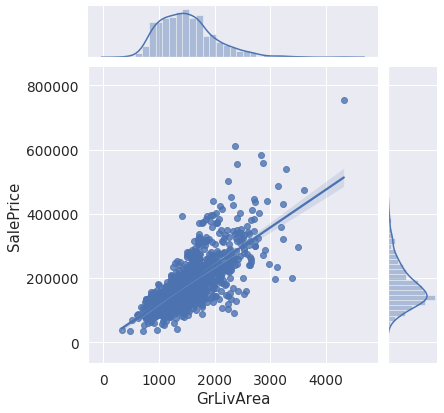

In [17]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='reg')

# Garage Cars Vs Sale Price

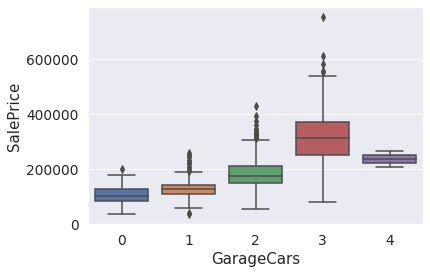

In [18]:
sns.boxplot(x = train['GarageCars'], y = train['SalePrice'])

### As we can see 4 Garage Cars are very less and do not fit the curve set by 0,1,2,3 so it is removed

In [19]:
train = train.drop(train[(train['GarageCars']>3) & (train['SalePrice']<300000)].index).reset_index(drop=True)

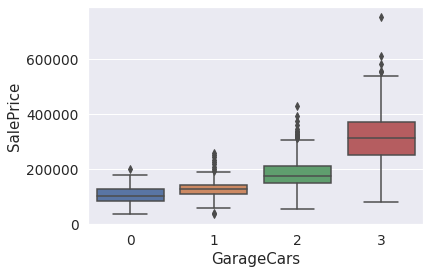

In [20]:
sns.boxplot(x = train['GarageCars'], y = train['SalePrice'])

# GarageArea vs SalePrice

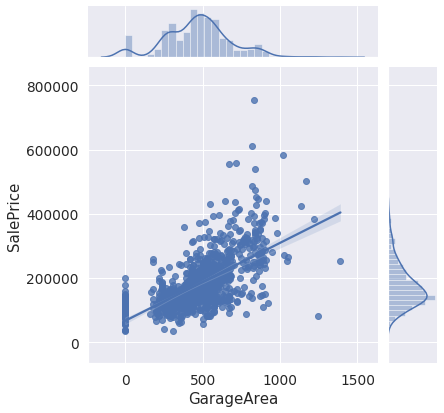

In [21]:
sns.jointplot(x = train['GarageArea'], y =train['SalePrice'],kind = 'reg')

### Similar to Living Area, Some Outliers are removed

In [22]:
train = train.drop(train[(train['GarageArea']>1000) 
                         & (train['SalePrice']<200000)].index).reset_index(drop=True)

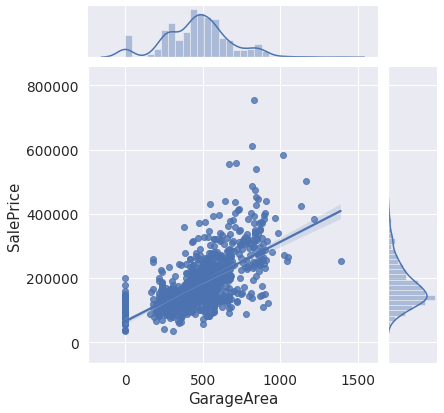

In [23]:
sns.jointplot(x = train['GarageArea'], y =train['SalePrice'],kind = 'reg')

# Basement Area Vs Sale Price

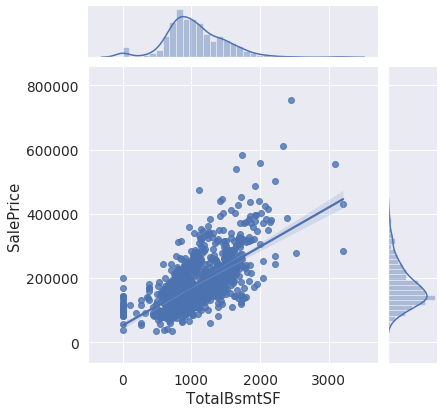

In [24]:
sns.jointplot(x = train['TotalBsmtSF'], y = train['SalePrice'], kind = 'reg')

# First Floor Area Vs Sale Price

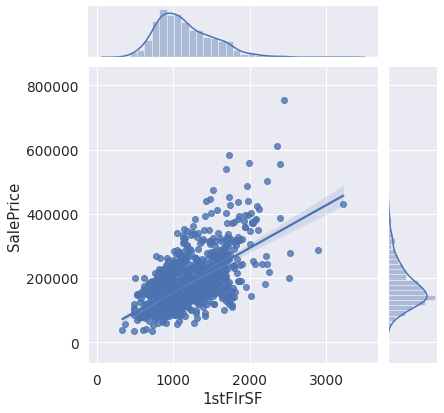

In [25]:
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='reg')

# Total Rooms vs Sale Price

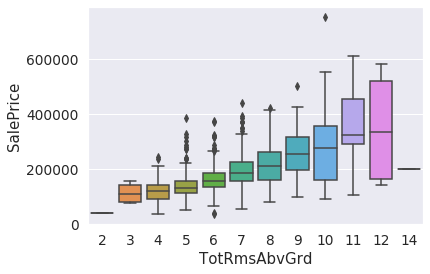

In [26]:
sns.boxplot(x = train['TotRmsAbvGrd'], y= train['SalePrice'])


# Year Built Vs Sale Price

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106]),
 <a list of 107 Text xticklabel objects>)

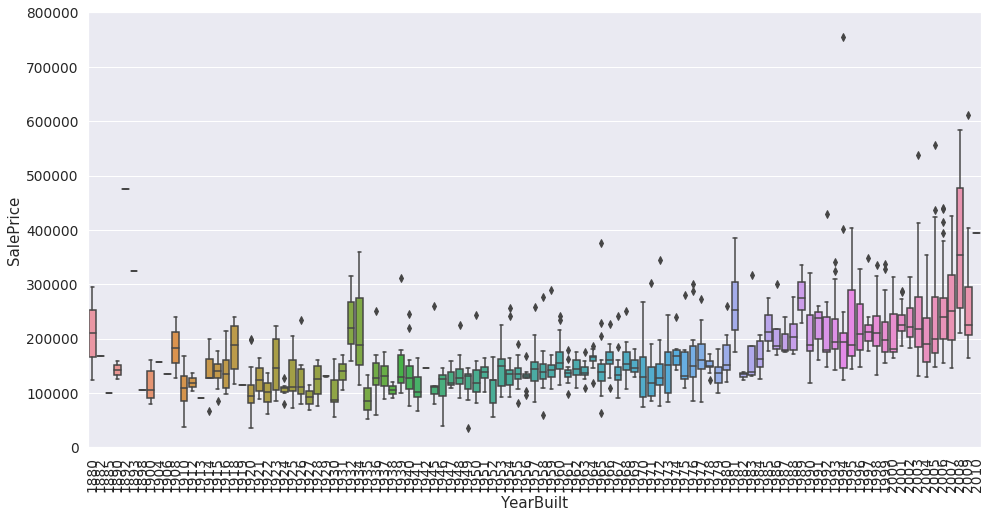

In [27]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
f, ax = plt.subplots(figsize=(16,8))
sns.set(font_scale=0.25)
fig = sns.boxplot(x=var, y= 'SalePrice', data = data)
fig.axis(ymin = 0,ymax = 800000)
plt.xticks(rotation = 90)

In [28]:
print(train.shape)
print(test.shape)

(1096, 80)
(360, 79)


# Combining Datasets

In [29]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)



In [30]:
print(train.shape,test.shape,all_data.shape)

(1096, 80) (360, 79) (1456, 79)


Now After visualization and cleaning, the last step left is to add some value where data was not present

# Find Missing Ratio Of Dataset

In [31]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data)

              Missing Ratio
PoolQC            99.519231
MiscFeature       96.359890
Alley             93.818681
Fence             80.700549
FireplaceQu       47.252747
LotFrontage       17.788462
GarageYrBlt        5.563187
GarageType         5.563187
GarageFinish       5.563187
GarageQual         5.563187
GarageCond         5.563187
BsmtFinType2       2.609890
BsmtExposure       2.609890
BsmtFinType1       2.541209
BsmtCond           2.541209
BsmtQual           2.541209
MasVnrArea         0.549451
MasVnrType         0.549451
Electrical         0.068681


Text(0.5, 1.0, 'Percent missing data by feature')

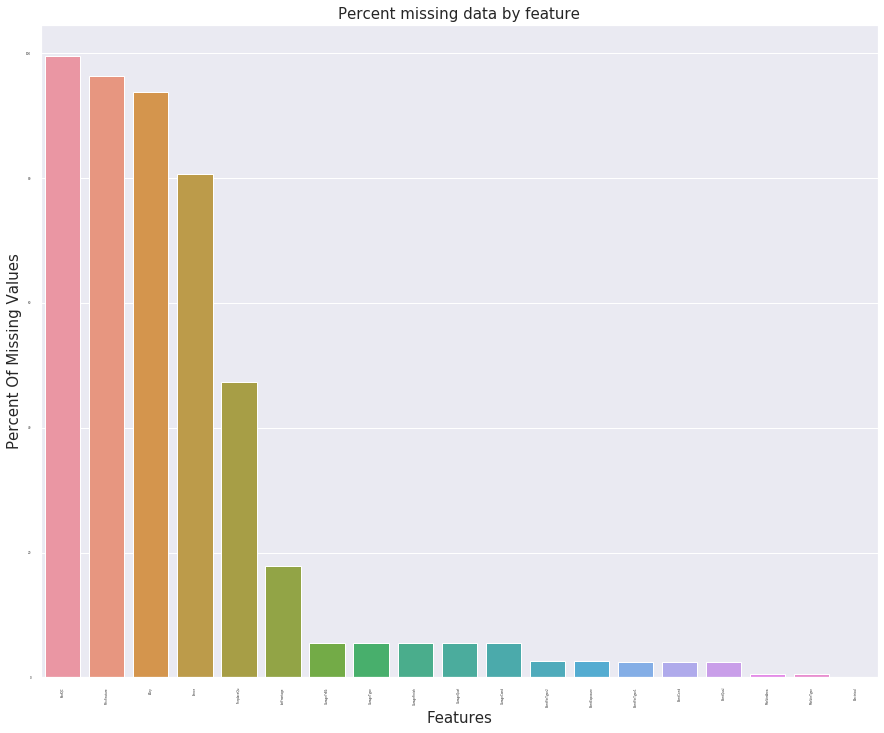

In [32]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Percent Of Missing Values',fontsize=15)
plt.title('Percent missing data by feature', fontsize = 15)

# On all the data labels based on the type of data some 0, None value is added

In [33]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [34]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [35]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [36]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [37]:
all_data['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [38]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# All labels are to be encoded in 1HotEncoder 
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','MSZoning','LandContour','LotConfig','LandSlope','Neighbourhood','Condition1',
        'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',''
       )

In [41]:
# for c in cols:
#     lb1 = LabelEncoder()
#     lb1.fit(list(all_data[c].values))
#     all_data[c] = lb1.transform(list(all_data[c].values))

In [42]:
allcols = all_data.columns

In [43]:
count = 0
for c in allcols:
    count+=1
    print(all_data[c].head())
    

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: object
0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64
0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64
0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object
0    None
1    None
2    None
3    None
4    None
Name: Alley, dtype: object
0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
Name: LotShape, dtype: object
0    Lvl
1    Lvl
2    Lvl
3    Lvl
4    Lvl
Name: LandContour, dtype: object
0    Inside
1       FR2
2    Inside
3    Corner
4       FR2
Name: LotConfig, dtype: object
0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
Name: LandSlope, dtype: object
0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
Name: Neighborhood, dtype: object
0     Norm
1    Feedr
2     Norm
3     Norm
4     Norm
Name: Condition1, dtype: object
0    Norm
1    Norm
2    Norm


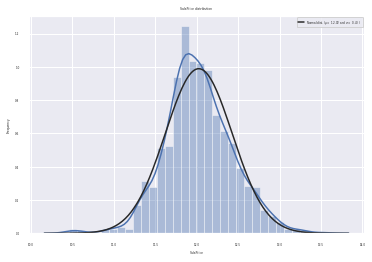

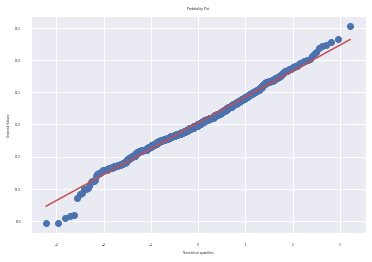

0.08079115533510817
0.8074864042733663


In [44]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit = norm)
(mu,sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)
plt.show()

y_train = train.SalePrice.values

print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

### Inference from above, SkewNess and Curtosis have reduced drastically. The dataset is quite normalized

In [45]:

def oneHotEncode(df,colNames):
    colNames = set(colNames)
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [46]:
all_data = oneHotEncode(all_data,allcols)

In [47]:

print(all_data.shape)

(1456, 337)


In [48]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [49]:
print(all_data)

      LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1451         62.0     7917            6       1999          2000         0.0   
1452         85.0    13175            6       1978          1988       119.0   
1453         66.0     9042            7       1941          2006         0.0   
1454         68.0     9717            5       1950          1996         0.0   
1455         75.0     9937            5       1965          1965         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF

In [50]:
print(train)

      LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1091         78.0     9317            6       2006          2006         0.0   
1092         60.0     6882            6       1914          2006         0.0   
1093         61.5     3696            8       1986          1986         0.0   
1094         50.0     6000            4       1936          1950         0.0   
1095         82.0    11880            7       1978          1978       206.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF

In [51]:
train = np.array(train)

# Training

In [52]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [53]:
model = Sequential([Dense(128,kernel_initializer='normal', activation='relu', input_shape=(337,)),
    Dense(128,kernel_initializer='normal', activation='relu'),
    Dense(128,kernel_initializer='normal', activation='relu'),
    Dense(1,kernel_initializer='normal', activation='linear'),])

In [54]:
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

In [55]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [56]:
hist = model.fit(train, y_train,
          batch_size=64, epochs=400,validation_split=0.15,callbacks=callbacks_list)

Train on 931 samples, validate on 165 samples
Epoch 1/400
931/931 [==============================] - 5s 5ms/step - loss: 9.1133 - mean_absolute_error: 9.1133 - val_loss: 4.8679 - val_mean_absolute_error: 4.8679

Epoch 00001: val_loss improved from inf to 4.86786, saving model to Weights-001--4.86786.hdf5
Epoch 2/400
931/931 [==============================] - 0s 49us/step - loss: 3.3953 - mean_absolute_error: 3.3953 - val_loss: 4.4603 - val_mean_absolute_error: 4.4603

Epoch 00002: val_loss improved from 4.86786 to 4.46028, saving model to Weights-002--4.46028.hdf5
Epoch 3/400
931/931 [==============================] - 0s 46us/step - loss: 1.9991 - mean_absolute_error: 1.9991 - val_loss: 0.7135 - val_mean_absolute_error: 0.7135

Epoch 00003: val_loss improved from 4.46028 to 0.71350, saving model to Weights-003--0.71350.hdf5
Epoch 4/400
931/931 [==============================] - 0s 45us/step - loss: 0.8465 - mean_absolute_error: 0.8465 - val_loss: 1.2911 - val_mean_absolute_error: 1.291

931/931 [==============================] - 0s 51us/step - loss: 0.2945 - mean_absolute_error: 0.2945 - val_loss: 0.5707 - val_mean_absolute_error: 0.5707

Epoch 00036: val_loss did not improve from 0.20727
Epoch 37/400
931/931 [==============================] - 0s 47us/step - loss: 0.4859 - mean_absolute_error: 0.4859 - val_loss: 0.4788 - val_mean_absolute_error: 0.4788

Epoch 00037: val_loss did not improve from 0.20727
Epoch 38/400
931/931 [==============================] - 0s 53us/step - loss: 0.4367 - mean_absolute_error: 0.4367 - val_loss: 0.2963 - val_mean_absolute_error: 0.2963

Epoch 00038: val_loss did not improve from 0.20727
Epoch 39/400
931/931 [==============================] - 0s 59us/step - loss: 0.2890 - mean_absolute_error: 0.2890 - val_loss: 0.1851 - val_mean_absolute_error: 0.1851

Epoch 00039: val_loss improved from 0.20727 to 0.18514, saving model to Weights-039--0.18514.hdf5
Epoch 40/400
931/931 [==============================] - 0s 61us/step - loss: 0.3209 - mean


Epoch 00072: val_loss did not improve from 0.15093
Epoch 73/400
931/931 [==============================] - 0s 50us/step - loss: 0.3434 - mean_absolute_error: 0.3434 - val_loss: 0.3752 - val_mean_absolute_error: 0.3752

Epoch 00073: val_loss did not improve from 0.15093
Epoch 74/400
931/931 [==============================] - 0s 63us/step - loss: 0.3188 - mean_absolute_error: 0.3188 - val_loss: 0.4404 - val_mean_absolute_error: 0.4404

Epoch 00074: val_loss did not improve from 0.15093
Epoch 75/400
931/931 [==============================] - 0s 65us/step - loss: 0.3113 - mean_absolute_error: 0.3113 - val_loss: 0.2171 - val_mean_absolute_error: 0.2171

Epoch 00075: val_loss did not improve from 0.15093
Epoch 76/400
931/931 [==============================] - 0s 56us/step - loss: 0.1986 - mean_absolute_error: 0.1986 - val_loss: 0.1910 - val_mean_absolute_error: 0.1910

Epoch 00076: val_loss did not improve from 0.15093
Epoch 77/400
931/931 [==============================] - 0s 55us/step - l

931/931 [==============================] - 0s 54us/step - loss: 0.3863 - mean_absolute_error: 0.3863 - val_loss: 0.2409 - val_mean_absolute_error: 0.2409

Epoch 00109: val_loss did not improve from 0.14353
Epoch 110/400
931/931 [==============================] - 0s 46us/step - loss: 0.2113 - mean_absolute_error: 0.2113 - val_loss: 0.1467 - val_mean_absolute_error: 0.1467

Epoch 00110: val_loss did not improve from 0.14353
Epoch 111/400
931/931 [==============================] - 0s 47us/step - loss: 0.1528 - mean_absolute_error: 0.1528 - val_loss: 0.1541 - val_mean_absolute_error: 0.1541

Epoch 00111: val_loss did not improve from 0.14353
Epoch 112/400
931/931 [==============================] - 0s 44us/step - loss: 0.1852 - mean_absolute_error: 0.1852 - val_loss: 0.2317 - val_mean_absolute_error: 0.2317

Epoch 00112: val_loss did not improve from 0.14353
Epoch 113/400
931/931 [==============================] - 0s 45us/step - loss: 0.1845 - mean_absolute_error: 0.1845 - val_loss: 0.1287 

931/931 [==============================] - 0s 43us/step - loss: 0.1586 - mean_absolute_error: 0.1586 - val_loss: 0.1803 - val_mean_absolute_error: 0.1803

Epoch 00145: val_loss did not improve from 0.11806
Epoch 146/400
931/931 [==============================] - 0s 45us/step - loss: 0.2455 - mean_absolute_error: 0.2455 - val_loss: 0.1406 - val_mean_absolute_error: 0.1406

Epoch 00146: val_loss did not improve from 0.11806
Epoch 147/400
931/931 [==============================] - 0s 45us/step - loss: 0.1248 - mean_absolute_error: 0.1248 - val_loss: 0.1126 - val_mean_absolute_error: 0.1126

Epoch 00147: val_loss improved from 0.11806 to 0.11258, saving model to Weights-147--0.11258.hdf5
Epoch 148/400
931/931 [==============================] - 0s 39us/step - loss: 0.1250 - mean_absolute_error: 0.1250 - val_loss: 0.1233 - val_mean_absolute_error: 0.1233

Epoch 00148: val_loss did not improve from 0.11258
Epoch 149/400
931/931 [==============================] - 0s 51us/step - loss: 0.1654 - 

931/931 [==============================] - 0s 47us/step - loss: 0.1335 - mean_absolute_error: 0.1335 - val_loss: 0.1255 - val_mean_absolute_error: 0.1255

Epoch 00182: val_loss did not improve from 0.11258
Epoch 183/400
931/931 [==============================] - 0s 47us/step - loss: 0.1298 - mean_absolute_error: 0.1298 - val_loss: 0.1369 - val_mean_absolute_error: 0.1369

Epoch 00183: val_loss did not improve from 0.11258
Epoch 184/400
931/931 [==============================] - 0s 47us/step - loss: 0.2948 - mean_absolute_error: 0.2948 - val_loss: 0.4677 - val_mean_absolute_error: 0.4677

Epoch 00184: val_loss did not improve from 0.11258
Epoch 185/400
931/931 [==============================] - 0s 46us/step - loss: 0.3830 - mean_absolute_error: 0.3830 - val_loss: 0.2842 - val_mean_absolute_error: 0.2842

Epoch 00185: val_loss did not improve from 0.11258
Epoch 186/400
931/931 [==============================] - 0s 48us/step - loss: 0.2010 - mean_absolute_error: 0.2010 - val_loss: 0.2162 

931/931 [==============================] - 0s 53us/step - loss: 0.1313 - mean_absolute_error: 0.1313 - val_loss: 0.1738 - val_mean_absolute_error: 0.1738

Epoch 00219: val_loss did not improve from 0.10661
Epoch 220/400
931/931 [==============================] - 0s 56us/step - loss: 0.1133 - mean_absolute_error: 0.1133 - val_loss: 0.1060 - val_mean_absolute_error: 0.1060

Epoch 00220: val_loss improved from 0.10661 to 0.10602, saving model to Weights-220--0.10602.hdf5
Epoch 221/400
931/931 [==============================] - 0s 59us/step - loss: 0.1424 - mean_absolute_error: 0.1424 - val_loss: 0.2413 - val_mean_absolute_error: 0.2413

Epoch 00221: val_loss did not improve from 0.10602
Epoch 222/400
931/931 [==============================] - 0s 42us/step - loss: 0.2123 - mean_absolute_error: 0.2123 - val_loss: 0.1558 - val_mean_absolute_error: 0.1558

Epoch 00222: val_loss did not improve from 0.10602
Epoch 223/400
931/931 [==============================] - 0s 50us/step - loss: 0.1335 - 

931/931 [==============================] - 0s 56us/step - loss: 0.1390 - mean_absolute_error: 0.1390 - val_loss: 0.2141 - val_mean_absolute_error: 0.2141

Epoch 00256: val_loss did not improve from 0.10602
Epoch 257/400
931/931 [==============================] - 0s 57us/step - loss: 0.2147 - mean_absolute_error: 0.2147 - val_loss: 0.1593 - val_mean_absolute_error: 0.1593

Epoch 00257: val_loss did not improve from 0.10602
Epoch 258/400
931/931 [==============================] - 0s 56us/step - loss: 0.1834 - mean_absolute_error: 0.1834 - val_loss: 0.1970 - val_mean_absolute_error: 0.1970

Epoch 00258: val_loss did not improve from 0.10602
Epoch 259/400
931/931 [==============================] - 0s 56us/step - loss: 0.1789 - mean_absolute_error: 0.1789 - val_loss: 0.1541 - val_mean_absolute_error: 0.1541

Epoch 00259: val_loss did not improve from 0.10602
Epoch 260/400
931/931 [==============================] - 0s 59us/step - loss: 0.1333 - mean_absolute_error: 0.1333 - val_loss: 0.2140 


Epoch 00292: val_loss did not improve from 0.09830
Epoch 293/400
931/931 [==============================] - 0s 54us/step - loss: 0.1147 - mean_absolute_error: 0.1147 - val_loss: 0.1905 - val_mean_absolute_error: 0.1905

Epoch 00293: val_loss did not improve from 0.09830
Epoch 294/400
931/931 [==============================] - 0s 47us/step - loss: 0.1506 - mean_absolute_error: 0.1506 - val_loss: 0.1309 - val_mean_absolute_error: 0.1309

Epoch 00294: val_loss did not improve from 0.09830
Epoch 295/400
931/931 [==============================] - 0s 46us/step - loss: 0.1216 - mean_absolute_error: 0.1216 - val_loss: 0.1240 - val_mean_absolute_error: 0.1240

Epoch 00295: val_loss did not improve from 0.09830
Epoch 296/400
931/931 [==============================] - 0s 51us/step - loss: 0.1370 - mean_absolute_error: 0.1370 - val_loss: 0.1829 - val_mean_absolute_error: 0.1829

Epoch 00296: val_loss did not improve from 0.09830
Epoch 297/400
931/931 [==============================] - 0s 56us/ste

931/931 [==============================] - 0s 56us/step - loss: 0.1615 - mean_absolute_error: 0.1615 - val_loss: 0.4051 - val_mean_absolute_error: 0.4051

Epoch 00330: val_loss did not improve from 0.09565
Epoch 331/400
931/931 [==============================] - 0s 57us/step - loss: 0.3384 - mean_absolute_error: 0.3384 - val_loss: 0.4101 - val_mean_absolute_error: 0.4101

Epoch 00331: val_loss did not improve from 0.09565
Epoch 332/400
931/931 [==============================] - 0s 49us/step - loss: 0.1698 - mean_absolute_error: 0.1698 - val_loss: 0.1452 - val_mean_absolute_error: 0.1452

Epoch 00332: val_loss did not improve from 0.09565
Epoch 333/400
931/931 [==============================] - 0s 51us/step - loss: 0.1680 - mean_absolute_error: 0.1680 - val_loss: 0.1141 - val_mean_absolute_error: 0.1141

Epoch 00333: val_loss did not improve from 0.09565
Epoch 334/400
931/931 [==============================] - 0s 52us/step - loss: 0.1172 - mean_absolute_error: 0.1172 - val_loss: 0.1110 

931/931 [==============================] - 0s 41us/step - loss: 0.1190 - mean_absolute_error: 0.1190 - val_loss: 0.0965 - val_mean_absolute_error: 0.0965

Epoch 00367: val_loss did not improve from 0.09267
Epoch 368/400
931/931 [==============================] - 0s 47us/step - loss: 0.1026 - mean_absolute_error: 0.1026 - val_loss: 0.1496 - val_mean_absolute_error: 0.1496

Epoch 00368: val_loss did not improve from 0.09267
Epoch 369/400
931/931 [==============================] - 0s 44us/step - loss: 0.1158 - mean_absolute_error: 0.1158 - val_loss: 0.1049 - val_mean_absolute_error: 0.1049

Epoch 00369: val_loss did not improve from 0.09267
Epoch 370/400
931/931 [==============================] - 0s 42us/step - loss: 0.1482 - mean_absolute_error: 0.1482 - val_loss: 0.1153 - val_mean_absolute_error: 0.1153

Epoch 00370: val_loss did not improve from 0.09267
Epoch 371/400
931/931 [==============================] - 0s 41us/step - loss: 0.1366 - mean_absolute_error: 0.1366 - val_loss: 0.2147 

Got a min Val_Loss of 0.09903

# Prediction and storing Results

In [57]:
#Prediction Time , Model can also be loaded
predictions = model.predict(test)


In [58]:
my_submission = pd.DataFrame({'Id':test_ID,'SalePrice':predictions.reshape(-1)})
my_submission.to_csv('{}.csv'.format('submission(NN).csv'),index=False)
print('A submission file has been made')

A submission file has been made


In [59]:
print(predictions)

[[11.087017 ]
 [11.680156 ]
 [11.784376 ]
 [11.845741 ]
 [11.661452 ]
 [12.635394 ]
 [12.19175  ]
 [12.369545 ]
 [12.088269 ]
 [12.682654 ]
 [12.148894 ]
 [12.137212 ]
 [11.576407 ]
 [11.816764 ]
 [11.75736  ]
 [12.6321   ]
 [12.096182 ]
 [11.762476 ]
 [11.898675 ]
 [11.630677 ]
 [11.5908575]
 [12.3101225]
 [11.36463  ]
 [11.264019 ]
 [11.978765 ]
 [11.614609 ]
 [12.320008 ]
 [12.322074 ]
 [12.326718 ]
 [11.705886 ]
 [11.9678755]
 [11.594112 ]
 [11.8750725]
 [12.347337 ]
 [12.133657 ]
 [11.605876 ]
 [11.669332 ]
 [11.427206 ]
 [12.1709585]
 [11.764634 ]
 [11.616036 ]
 [12.12714  ]
 [12.922051 ]
 [11.421193 ]
 [11.432149 ]
 [11.8759365]
 [12.017556 ]
 [11.890147 ]
 [11.591963 ]
 [11.77567  ]
 [11.667427 ]
 [11.905391 ]
 [12.222322 ]
 [11.689507 ]
 [12.251631 ]
 [12.220467 ]
 [12.14745  ]
 [12.280341 ]
 [12.378462 ]
 [12.132643 ]
 [11.843738 ]
 [12.194123 ]
 [11.723024 ]
 [11.681176 ]
 [12.137879 ]
 [12.328271 ]
 [12.339809 ]
 [12.165939 ]
 [12.190608 ]
 [13.157258 ]
 [11.947568 ]
 [11.9